In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame,Series

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data_to_load = pd.read_csv('.\\Resources\\mouse_drug_data.csv')
clinical_trial_data_to_load = pd.read_csv('.\\Resources\\clinicaltrial_data.csv')

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedata = (mouse_drug_data_to_load)
trialdata = (clinical_trial_data_to_load)

# Combine the data into a single dataset
drugdata = pd.merge(trialdata, mousedata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
drugdata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumorvolume = drugdata.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumorvolumedf = DataFrame(tumorvolume)

# Preview DataFrame
tumorvolumedf.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorvolumesem = drugdata.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumorvolumesemdf = DataFrame(tumorvolumesem)

# Preview DataFrame
tumorvolumesemdf.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
#unstack pivots the data and the list comprehension removes the 'Drug_' from the column names
tvsdf = tumorvolumesemdf.unstack(level=0)
tvsdf.columns = [x[1] for x in tvsdf.columns]

tvdf = tumorvolumedf.unstack(level=0)
tvdf.columns = [x[1] for x in tvdf.columns]

# Preview that Reformatting worked
tvdf.head(10)

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


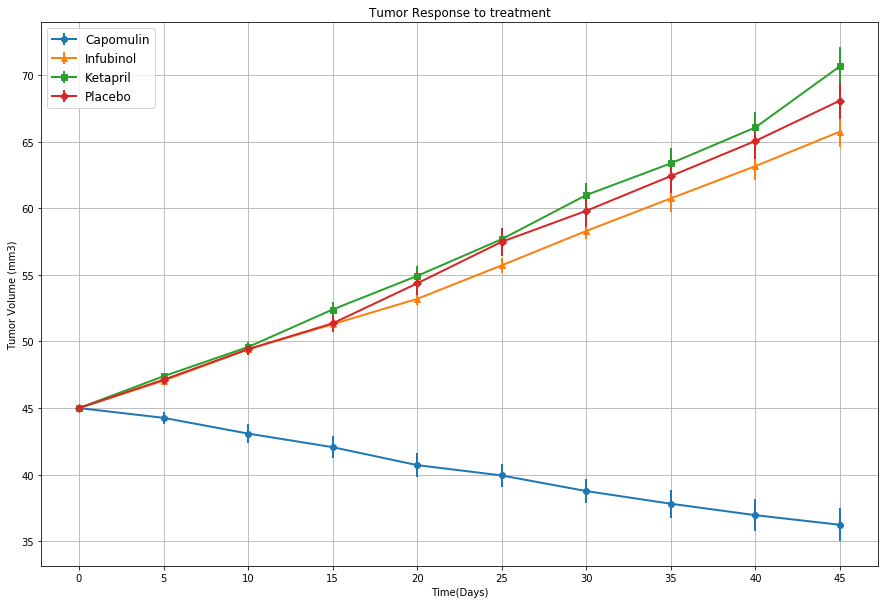

In [5]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (15,10))
plt.xticks(np.arange(0, tvdf.index.max()+3 , 5))
plt.grid(b=True)

#Set up for loop, drugs and markers will hold the correct option for the chart to select drugs and markers
#Counter is used to move sequentially through the lists
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
markers = ["o","^","s","D"]
counter =0

for column in range(4):
    plt.errorbar(tvdf.index, tvdf[drugs[counter]],yerr=tvsdf[drugs[counter]],linewidth=2,marker=markers[counter])
    counter +=1

#Incorporate the other graph properties    
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to treatment")
plt.legend(loc=2, fontsize="large")

# Save the Figure
plt.savefig('.\\Output\\tumorresponsetotreatment.png')
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metsite = drugdata.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
metsitedf = DataFrame(metsite)
# Preview DataFrame
drugdata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metsitesem = drugdata.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
metsitesemdf = DataFrame(metsitesem)

# Preview DataFrame
metsitesemdf.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
mssdf = metsitesemdf.unstack(level=0)
mssdf.columns = [x[1] for x in mssdf.columns]

msdf = metsitedf.unstack(level=0)
msdf.columns = [x[1] for x in msdf.columns]

# Preview that Reformatting worked
msdf.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


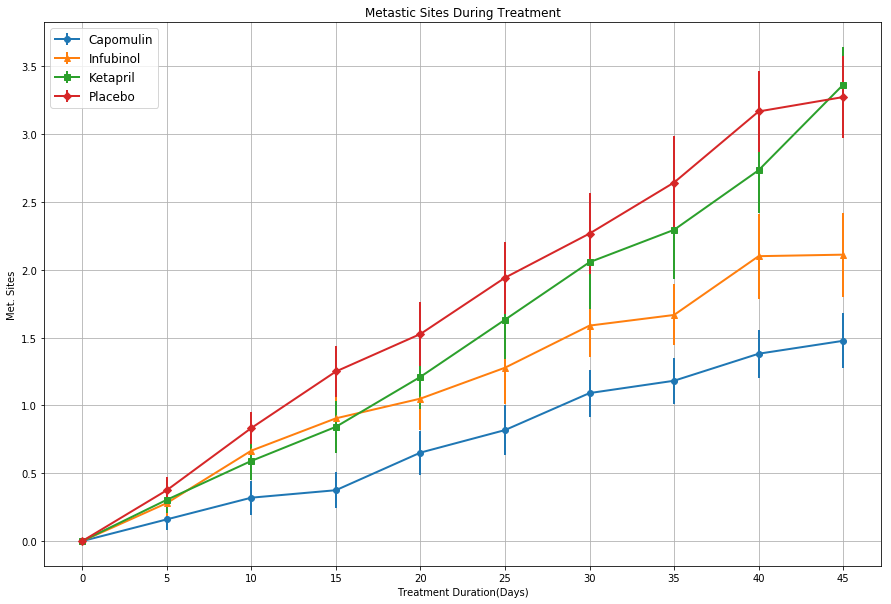

In [9]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (15,10))
plt.xticks(np.arange(0, tvdf.index.max()+3 , 5))
plt.grid(b=True)

#Reset counter for new loop
counter =0

for column in range(4):
    plt.errorbar(msdf.index, msdf[drugs[counter]],yerr=mssdf[drugs[counter]],linewidth=2,marker=markers[counter])
    counter +=1

plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met. Sites")
plt.title("Metastic Sites During Treatment")

plt.legend(loc=2, fontsize="large")

# Show the Figure
plt.savefig('.\\Output\\metasticsitesduringtreatment.png')
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice = drugdata.groupby(["Drug","Timepoint"])["Mouse ID"].count()
# Convert to DataFrame
micedf = DataFrame(mice)
# Preview DataFrame
micedf.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [11]:
# Minor Data Munging to Re-Format the Data Frames
micedf = mice.unstack(level=0)

# Preview the Data Frame
micedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 45
Data columns (total 10 columns):
Capomulin    10 non-null int64
Ceftamin     10 non-null int64
Infubinol    10 non-null int64
Ketapril     10 non-null int64
Naftisol     10 non-null int64
Placebo      10 non-null int64
Propriva     10 non-null int64
Ramicane     10 non-null int64
Stelasyn     10 non-null int64
Zoniferol    10 non-null int64
dtypes: int64(10)
memory usage: 880.0 bytes


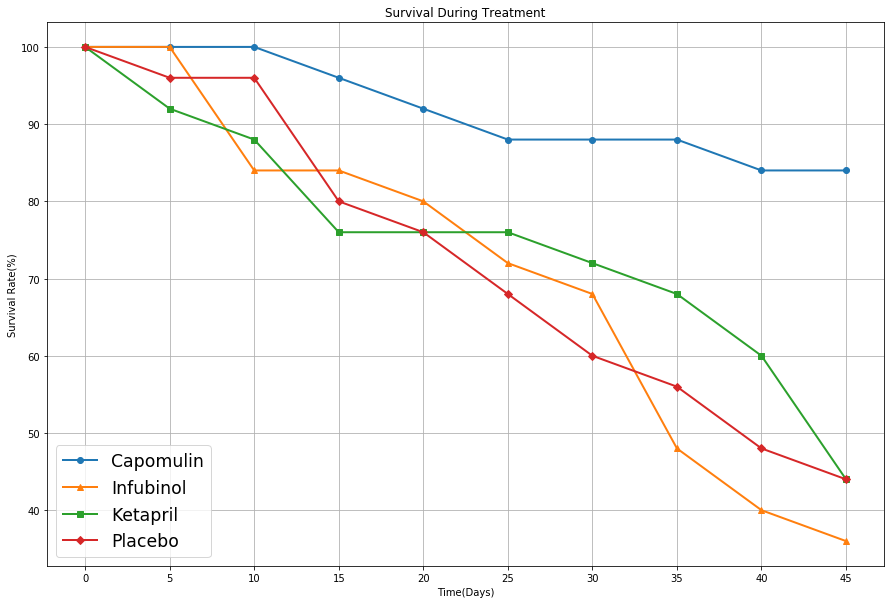

In [12]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (15,10))
plt.xticks(np.arange(0, tvdf.index.max()+3 , 5))
plt.grid(b=True)

counter =0

for column in range(4):
    plt.plot(micedf.index, micedf[drugs[counter]]/25*100,linewidth=2,marker=markers[counter])
    counter +=1

plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate(%)")
plt.title("Survival During Treatment")

plt.legend(loc=3, fontsize="xx-large")

# Save the Figure
plt.savefig('.\\Output\\survivalduringtreatment.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
percentchange = Series(tvdf.pct_change(9).iloc[9]*100)

# Display the data to confirm
perchatardrugs = Series(percentchange.iloc[[0,2,3,5]])
perchatardrugs

Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
Name: 45, dtype: float64

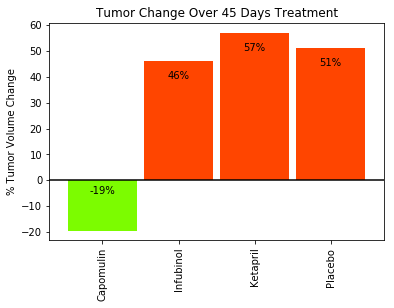

In [14]:
# Orient widths. Add labels, tick marks, etc.
ax = perchatardrugs.plot(kind="bar",title="Tumor Change Over 45 Days Treatment",\
                         color = ['orangered' if perchatardrugs[r] > 0 else 'lawngreen' for r in range(4)],width=.9)
plt.ylabel("% Tumor Volume Change")
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero

# Use functions to label the percentages of changes
def add_value_labels(ax):
    for rect in ax.patches:
        # Get X and Y placement of label from rect
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label
        space = -10
        # Vertical alignment for positive values
        va = 'top'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -3.5
            # Vertically align label at top
            va = 'bottom'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}%".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,                     # Vertically align label differently for
            color = "black")        # positive and negative values.

# Call the function above
add_value_labels(ax)

# Save the Figure
plt.savefig('.\\Output\\tumorchangeduringtreatment.png')